# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jessica Wahyudi
- **Email:** jsc.wahyudi@gmail.com
- **ID Dicoding:** jsc_wahyudi

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Kapan jam sibuk penyewaan sepeda pada workday dan weekend?

## Import Semua Packages/Library yang Digunakan

In [4]:
# Mengimpor pandas untuk manipulasi dan analisis data dalam bentuk DataFrame
import pandas as pd

# Mengimpor numpy untuk melakukan operasi matematika dan manipulasi array
import numpy as np

# Mengimpor matplotlib.pyplot untuk membuat visualisasi data dalam bentuk grafik
import matplotlib.pyplot as plt

# Mengimpor seaborn untuk membuat visualisasi data yang lebih menarik dan informatif
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# Memuat dataset ke dalam dataframe
df = pd.read_csv('data/hour.csv')

# Informasi umum tentang dataset
print(df.info())

# Melihat ringkasan statistik dasar untuk kolom numerik
print(df.describe())

# Melihat daftar kolom yang ada dalam dataframe
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
          instant        season            y

**Insight:**
- Dataset berhasil dimuat ke dalam DataFrame
- Kolom-kolom yang ada mencakup variabel 'instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt'

### Assessing Data

In [6]:
# cek data null
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
# cek data kembar
df.duplicated().sum()

0

In [8]:
data = df['cnt']
# Menentukan kolom yang akan dianalisis untuk outliers, untuk kolom 'cnt'
# Menghitung Q1 (25th percentile) dan Q3 (75th percentile)
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)

# Menghitung IQR (Interquartile Range)
iqr = q75 - q25

# Menghitung cut-off untuk mendeteksi outliers
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

# Menemukan outliers
outliers = df[(data < minimum) | (data > maximum)]
outliers_index = outliers.index
print(len(outliers))

505


**Insight:**
- Tidak ada data yang null atau duplikat, yang berarti dataset dalam kondisi baik.
- Terdeteksi 505 outliers dalam kolom jumlah rental (cnt), yang mungkin mengindikasikan adanya faktor-faktor ekstrem (misalnya cuaca buruk atau acara khusus) yang mempengaruhi jumlah rental sepeda.

### Cleaning Data

In [9]:
# Menghapus outliers
df = df.drop(outliers_index)
# Menampilkan outliers
print(df)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

**Insight:**
- Dataset telah dibersihkan dari outliers, menyisakan 16.874 baris data bersih yang akan digunakan untuk analisis lebih lanjut.
- Pembersihan ini penting agar analisis berikutnya tidak terdistorsi oleh data ekstrem yang mungkin tidak representatif.

## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
# Mengganti nilai numerik dengan string deskriptif untuk kolom 'weathersit'
weather_mapping = {
    1: 'Clear, Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Snow, Rain',
    4: 'Heavy Rain, Storm'
}

# Menggunakan .replace() untuk mengganti nilai pada kolom 'weathersit' sesuai dengan mapping di atas
df['weathersit'] = df['weathersit'].replace(weather_mapping)

# Mengelompokkan data berdasarkan 'weathersit' dan menghitung total pendaftar (cnt) untuk setiap kategori cuaca
total_cnt_by_weather = df.groupby('weathersit')['cnt'].sum().reset_index()

# Menampilkan hasil total pendaftar berdasarkan kategori cuaca
print(total_cnt_by_weather)

          weathersit      cnt
0  Clear, Few clouds  2042163
1  Heavy Rain, Storm      223
2   Light Snow, Rain   149213
3      Mist + Cloudy   722712


In [11]:
# Menghitung rata-rata jumlah rental sepeda (cnt) untuk hari kerja (workdays)
average_workday = df[df['workingday'] == 1].groupby('hr')['cnt'].mean().reset_index()

# Menampilkan hasil rata-rata jumlah rental sepeda untuk hari kerja
print(average_workday)

# Menghitung rata-rata rental sepeda (cnt) untuk akhir pekan (weekends)
average_weekend = df[df['workingday'] == 0].groupby('hr')['cnt'].mean().reset_index()

# Menampilkan hasil rata-rata jumlah rental sepeda untuk akhir pekan
print(average_weekend)

    hr         cnt
0    0   36.786290
1    1   16.552632
2    2    8.683778
3    3    4.942553
4    4    5.429787
5    5   24.913131
6    6  102.500000
7    7  290.612903
8    8  396.501355
9    9  241.518145
10  10  135.366935
11  11  158.229839
12  12  200.820926
13  13  198.429719
14  14  182.631791
15  15  201.331325
16  16  293.122244
17  17  411.847458
18  18  393.463612
19  19  339.070248
20  20  249.718876
21  21  186.287149
22  22  138.389558
23  23   88.708835
    hr         cnt
0    0   90.800000
1    1   69.508696
2    2   53.171053
3    3   25.775330
4    4    8.264317
5    5    8.689189
6    6   18.742358
7    7   43.406926
8    8  105.653680
9    9  171.623377
10  10  255.909091
11  11  312.349345
12  12  340.387850
13  13  338.033654
14  14  343.907834
15  15  339.032110
16  16  334.525114
17  17  310.170404
18  18  277.728070
19  19  231.673913
20  20  174.739130
21  21  142.060870
22  22  116.060870
23  23   85.930435


**Insight:**
- Penggunaan sepeda paling banyak terjadi saat cuaca cerah atau berawan, sedangkan paling sedikit saat terjadi hujan lebat atau badai. Cuaca yang baik sangat mempengaruhi penggunaan sepeda.
- Pada hari kerja, penggunaan sepeda paling ramai terjadi pada jam sibuk pagi (08.00) dan sore (17.00-18.00), mengindikasikan bahwa sepeda digunakan sebagai transportasi harian.
- Pada akhir pekan, puncak penggunaan terjadi pada siang hari (12.00-16.00), yang kemungkinan besar digunakan untuk rekreasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

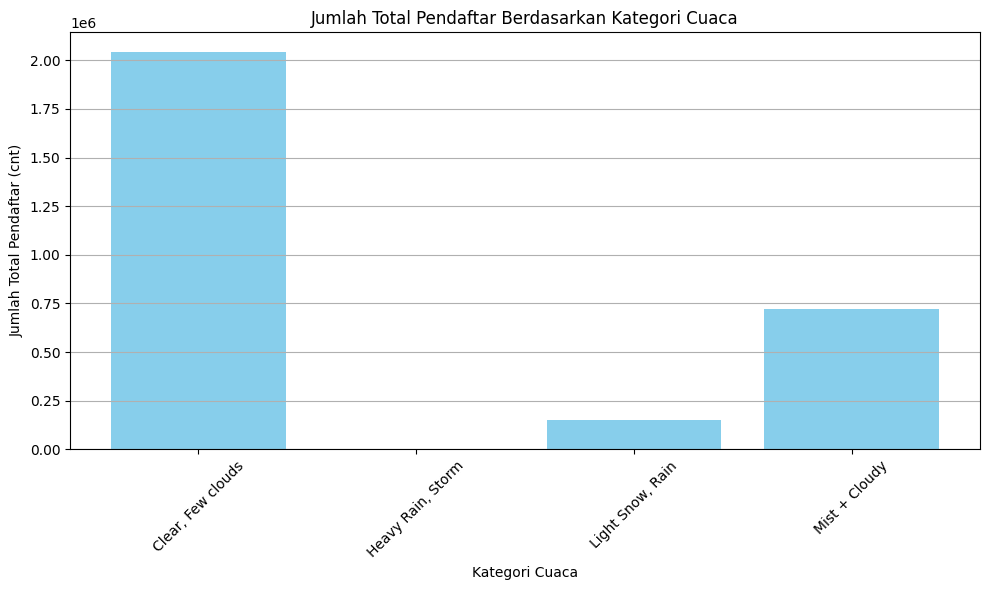

In [12]:
# Membuat grafik batang untuk menggambarkan hasil
plt.figure(figsize=(10, 6))
plt.bar(total_cnt_by_weather['weathersit'], total_cnt_by_weather['cnt'], color='skyblue')
plt.title('Jumlah Total Pendaftar Berdasarkan Kategori Cuaca')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Jumlah Total Pendaftar (cnt)')
plt.xticks(rotation=45)  # Memutar label pada sumbu x untuk keterbacaan
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

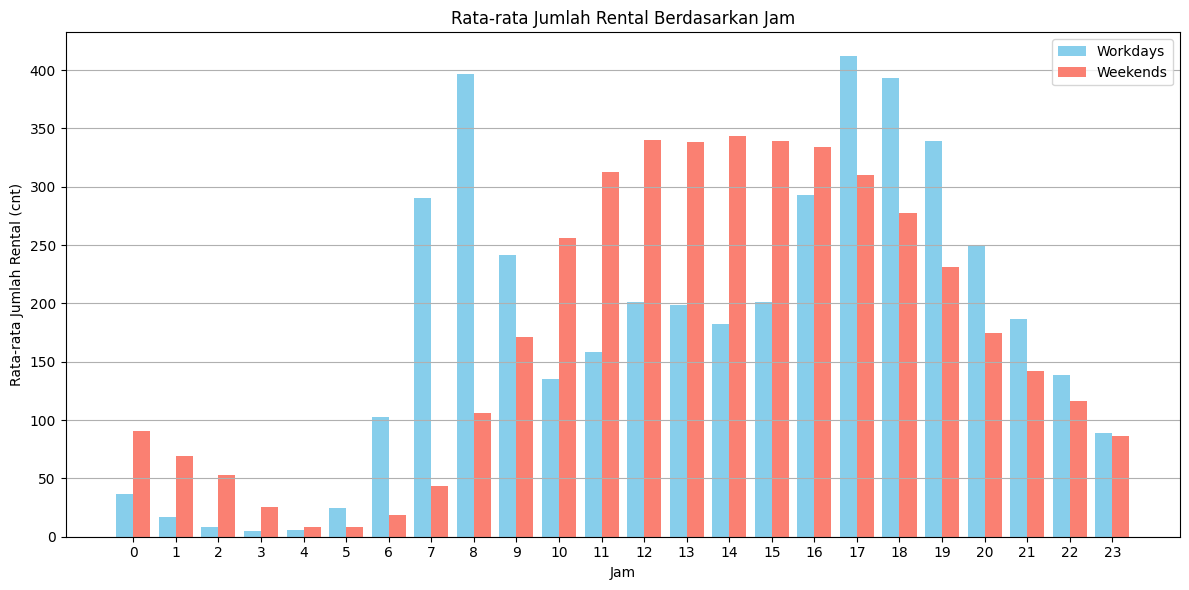

In [13]:
# Membuat grafik batang untuk membandingkan rata-rata rental
plt.figure(figsize=(12, 6))
plt.bar(average_workday['hr'] - 0.2, average_workday['cnt'], width=0.4, label='Workdays', color='skyblue')
plt.bar(average_weekend['hr'] + 0.2, average_weekend['cnt'], width=0.4, label='Weekends', color='salmon')

plt.title('Rata-rata Jumlah Rental Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Rental (cnt)')
plt.xticks(range(0, 24))  # Menampilkan jam dari 0 hingga 23
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**
- Visualisasi menunjukkan bahwa cuaca cerah dan berawan adalah kondisi di mana pengguna lebih sering menyewa sepeda, sementara hujan lebat dan badai menurunkan jumlah pengguna secara signifikan.
- Pada hari kerja, penggunaan sepeda mencapai puncak di pagi dan sore hari, sesuai dengan jam sibuk. Pada akhir pekan, penggunaan meningkat di siang hari, yang menandakan bahwa orang lebih memilih bersepeda untuk aktivitas rekreasi.

## Conclusion

- Pertanyaan 1 : Cuaca cerah mendorong peningkatan jumlah rental sepeda, yang dapat dimanfaatkan oleh layanan untuk memberikan promosi lebih pada hari-hari cerah.
- Pertanyaan 2 : Pada hari kerja, penggunaan sepeda tinggi di jam sibuk, sehingga penambahan fasilitas di area strategis dapat membantu mengatasi lonjakan pengguna. Akhir pekan lebih ramai di siang hari, sehingga acara rekreasi atau promosi khusus bisa mendorong lebih banyak penggunaan sepeda pada waktu tersebut.